Linear Regression

In [ ]:
 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 50)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')


def calc_slope(xs, ys):

    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

def best_fit(xs, ys):

    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

def reg_line (m, c, X):
    
    return [(m*x)+c for x in X]

def sum_sq_err(ys_real, ys_predicted):

    sse =  sum((ys_predicted - ys_real) * (ys_predicted - ys_real))
    
    return sse

def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared 
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

def plot_reg(X, Y, Y_pred):
    plt.scatter(X, Y, color='#003F72', label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.legend(loc=4)
    plt.show()
    return None

sample data

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


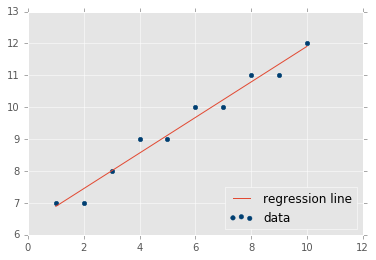

In [4]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

m, c = best_fit(X, Y)
Y_pred = reg_line(m, c, X)
r_squared = r_squared(Y, Y_pred)

print ('Basic Regression Diagnostics')
print ('----------------------------')
print ('Slope:', round(m, 2))
print ('Y-Intercept:', round(c, 2))
print ('R-Squared:', round(r_squared, 2))
print ('----------------------------')
print ('Model: Y =',round(m, 2),'* X +', round(c, 2))

plot_reg(X, Y, Y_pred)

Prediction sample

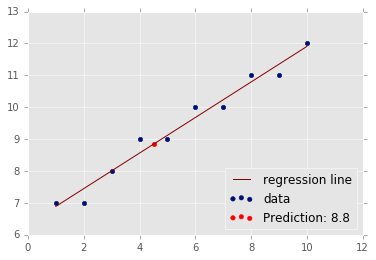

In [5]:
x_new = 4.5
y_new = (m*x_new)+c
y_new

plt.scatter(X, Y, color='#000F72', label='data')
plt.plot(X, Y_pred, color='#880000', label='regression line')
plt.scatter(x_new, y_new, color='r', label='Prediction: '+ str(np.round(y_new, 1)))
plt.legend(loc=4)
plt.show()

using statsmodel

In [1]:
#multivar
from statsmodels.formula.api import ols

my_model = ols(formula='gross~num_voted_users+cast_total_facebook_likes+budget+movie_facebook_likes', data=movie_df).fit()
my_model.summary()

NameError: name 'movie_df' is not defined

simple lin reg

In [ ]:
# building a linear regression model using statsmodel 
from statsmodels.formula.api import ols

lr_model = ols(formula='mpg~weight', data=df).fit()

lr_model.summary()

plotting a line w. predictors

In [ ]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
print(X_new.head())

# make predictions for those x values and store them
preds=model.predict(X_new)
print(preds)

# first, plot the observed data and the least squares line

data.plot(kind='scatter', x='TV', y='sales')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show

using seaborn to plot reg

In [ ]:
import seaborn as sns

sns.regplot(x='motifScore', y='expression', data=motif)